In [150]:
import requests
import json
import numpy as np
import pandas as pd
#from selenium import webdriver

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import matplotlib.pyplot as plt

import rasterio as rs
import numpy as np

from shapely.geometry import Polygon
from rasterio.mask import mask


In [21]:
street_name = input("Enter the street name: ") 

Enter the street name: hof ter lo


In [22]:
house_number = input("Enter the house number: ") 

Enter the house number: 6


In [23]:
post_code = input("Enter the postcode: ") 

Enter the postcode: 2140


In [25]:
def get_coordinates():
    response_API = requests.get('https://api.basisregisters.vlaanderen.be/v1/adresmatch',
                            params= {'straatnaam':street_name ,
                                     'huisnummer':house_number , 
                                     'postcode': post_code} ).json()


    coordinates = response_API['adresMatches'][0]['adresPositie']['point']['coordinates']
    x = coordinates[0]
    y = coordinates[1]

    gebouweenheden = requests.get(response_API['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    gebouw = requests.get(gebouweenheden['gebouw']['detail']).json()
    polygon_list = gebouw['geometriePolygoon']['polygon']['coordinates'][0]
    return coordinates


In [26]:
def get_polygon():
    
    response_API = requests.get('https://api.basisregisters.vlaanderen.be/v1/adresmatch',
                            params= {'straatnaam':street_name ,
                                     'huisnummer':house_number , 
                                     'postcode': post_code} ).json()


    coordinates = response_API['adresMatches'][0]['adresPositie']['point']['coordinates']
    x = coordinates[0]
    y = coordinates[1]

    gebouweenheden = requests.get(response_API['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    gebouw = requests.get(gebouweenheden['gebouw']['detail']).json()
    polygon_list = gebouw['geometriePolygoon']['polygon']['coordinates'][0]
    return polygon_list


In [30]:
dad = get_coordinates()
x_cord = dad[0]
y_cord = dad[1]

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("bounding_box.csv",sep = "\t")
dir(df)
df.reset_index(drop=True)

,file_name,left,bottom,right,top
0,zip+https://downloadagiv.blob.core.windows.net...,145000.0,238000.0,162000.0,247000.0
1,zip+https://downloadagiv.blob.core.windows.net...,162000.0,238000.0,194000.0,250000.0
2,zip+https://downloadagiv.blob.core.windows.net...,194000.0,238000.0,206000.0,248000.0
3,zip+https://downloadagiv.blob.core.windows.net...,53000.0,218000.0,66000.0,225500.0
4,zip+https://downloadagiv.blob.core.windows.net...,66000.0,218000.0,98000.0,232000.0
5,zip+https://downloadagiv.blob.core.windows.net...,98000.0,218000.0,130000.0,227000.0
6,zip+https://downloadagiv.blob.core.windows.net...,130000.0,218000.0,162000.0,238000.0
7,zip+https://downloadagiv.blob.core.windows.net...,162000.0,218000.0,194000.0,238000.0
8,zip+https://downloadagiv.blob.core.windows.net...,194000.0,218000.0,226000.0,238000.0
9,zip+https://downloadagiv.blob.core.windows.net...,226000.0,218000.0,238000.0,227000.0


In [31]:
def open_adress_tiff(x_cor,y_cor,df):
    for i in range(len(df)):
        if df.top[i]>=y_cor and  df.bottom[i]<= y_cor \
        and df.left[i]<=x_cor and df.right[i]>=x_cor:
            print(f"{df.top[i]}>{y_cord} and {df.bottom[i]}<={y_cord} \
                   and {df.left[i]}<={x_cord} and {df.right[i]}>={x_cord} i: {i}")
            
            if i < 10:
                file_nr = f"0{i}"
            else: file_nr = i
 
            files = {'DSM': f"https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k{file_nr}.zip", 
             'DTM': f"https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dtm-raster-1m/DHMVIIDTMRAS1m_k{file_nr}.zip"}
        
            print(files)
            for key, value in files.items():
                with urlopen(value) as zipresp:
                    print(f"Downloading {key} zip file")
                    with ZipFile(BytesIO(zipresp.read())) as zfile:
                        print(f"Extracting {key} zip file")
                        zfile.extractall(f'data/raster_files/{key}')
                print(f"Done extracting the {key} zip file ")
                
        
                    



In [32]:
open_adress_tiff(x_cord,y_cord,df)

218000.0>212084.28 and 198000.0<=212084.28                    and 130000.0<=155452.19 and 162000.0>=155452.19 i: 14
{'DSM': 'https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k14.zip', 'DTM': 'https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dtm-raster-1m/DHMVIIDTMRAS1m_k14.zip'}
Extracting DSM zip file
Done extracting the DSM zip file 
Extracting DTM zip file
Done extracting the DTM zip file 


In [148]:
import os

dsm_file = os.listdir(f"data/raster_files/DSM/GeoTIFF/")[0]
dsm = rs.open(f"data/raster_files/DSM/GeoTIFF/{dsm_file}")

dtm_file = os.listdir(f"data/raster_files/DTM/GeoTIFF/")[0]
dtm = rs.open(f"data/raster_files/DTM/GeoTIFF/{dtm_file}")




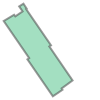

In [152]:
shape_poly = Polygon(get_polygon())
shape_poly

In [154]:
with rs.open(f"data/raster_files/DSM/GeoTIFF/{dsm_file}") as src:
    out_DSM_img,out_transform  = mask(dataset=src,shapes=[shape_poly],crop=True)
    out_meta_dsm = src.meta
    

ValueError: Input shapes do not overlap raster.

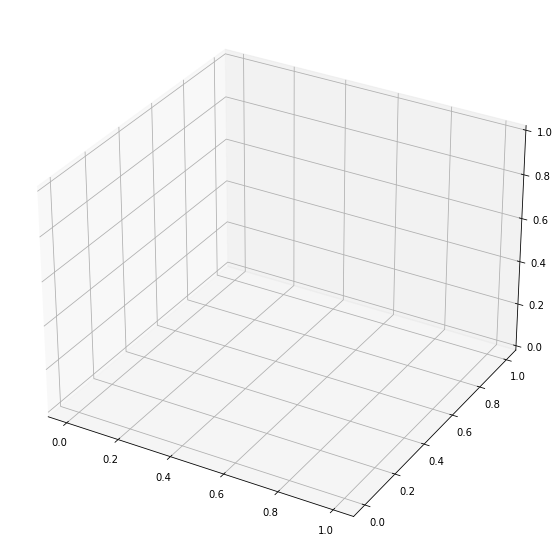

In [90]:

building_coordinates = get_polygon()
building_coordinates
building_coordinates_df = pd.DataFrame(building_coordinates,columns = ['X_val','Y_val'])
building_coordinates_df
min_x = min(building_coordinates_df.X_val)
min_y = min(building_coordinates_df.Y_val)
max_x = max(building_coordinates_df.X_val)
max_y = max(building_coordinates_df.Y_val)
    
ind_row, ind_col = rs.transform.TransformMethodsMixin.index(dsm,x_cord, y_cord)

    #print(f"min_X: {min_x} min_Y: {min_y} max_X: {max_x} max_y: {max_y}")
min_indx_row,min_indx_col = rs.transform.TransformMethodsMixin.index(dsm, min_x, min_y)
max_indx_row,max_indx_col = rs.transform.TransformMethodsMixin.index(dsm, max_x, max_y)
channel_slice = channel[ind_row - abs(max_indx_row - min_indx_row) :ind_row+abs(max_indx_row - min_indx_row),ind_col-abs(max_indx_col - min_indx_col):ind_col+abs(max_indx_col - min_indx_col)]
nx = channel_slice.shape[1]
ny = channel_slice.shape[0]
    

x = range(nx)
y = range(ny)


X,Y = np.meshgrid(x,y)
hf = plt.figure(figsize=(10,10))
ha = hf.add_subplot(111,projection = '3d')

ha.plot_surface(X,Y,channel_slice)
plt.show()



In [127]:
building_coordinates

[[155444.4075030163, 212110.6546132192],
 [155444.77691101283, 212110.87349321693],
 [155442.7674390152, 212113.99010121822],
 [155440.09467101097, 212112.3125332184],
 [155442.23860701174, 212109.17685321718],
 [155437.67835101485, 212106.069781214],
 [155436.93217501044, 212107.08808521554],
 [155430.99399900436, 212103.52597321197],
 [155430.4389910102, 212103.19304521382],
 [155430.59918300807, 212102.95893321186],
 [155435.17499101162, 212096.29998920858],
 [155446.34196701646, 212080.04699719697],
 [155445.23700701445, 212079.26798919588],
 [155461.11796702445, 212056.20802117884],
 [155467.10753503442, 212060.27336518466],
 [155466.59003103524, 212061.133845184],
 [155472.0987670347, 212065.15022918582],
 [155473.4071830362, 212066.1042131856],
 [155458.94971102476, 212087.21947720274],
 [155458.88916702569, 212087.30786120147],
 [155459.96622302383, 212087.99566920102],
 [155444.4075030163, 212110.6546132192]]

In [128]:
building_coordinates_df

,X_val,Y_val
0,155444.407503,212110.654613
1,155444.776911,212110.873493
2,155442.767439,212113.990101
3,155440.094671,212112.312533
4,155442.238607,212109.176853
5,155437.678351,212106.069781
6,155436.932175,212107.088085
7,155430.993999,212103.525973
8,155430.438991,212103.193045
9,155430.599183,212102.958933


In [129]:
print(f"min_X: {min_x} min_Y: {min_y} max_X: {max_x} max_y: {max_y}")

min_X: 155430.4389910102 min_Y: 212056.20802117884 max_X: 155473.4071830362 max_y: 212113.99010121822


In [130]:
min_indx_row,min_indx_col = rs.transform.TransformMethodsMixin.index(dsm, min_x, min_y)
max_indx_row,max_indx_col = rs.transform.TransformMethodsMixin.index(dsm, max_x, max_y)


In [131]:
min_indx_row

5943

In [132]:
min_indx_col

57430

In [133]:
max_indx_row

5886

In [134]:
max_indx_col

57473

In [143]:
dir(dsm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_get_rpcs',
 '_handle_crswkt',
 '_has_band',
 '_has_gcps_or_rpcs',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_rpcs',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_set_rpcs',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum

In [144]:
type(channel)

numpy.ndarray

In [121]:
ind_col+20

57472

IndexError: index 57452 is out of bounds for axis 0 with size 32000